# Decision Tree Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [16]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.drop('Purchased', axis=1)
y = dataset['Purchased']
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the Decision Tree Classification model on the Training set

In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=4 , min_samples_split=15 )
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

## Predicting a new result

In [53]:
print(classifier.predict([[30,87000]]))

[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Predicting the Test set results

In [54]:
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 3 29]]


0.94

In [56]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94

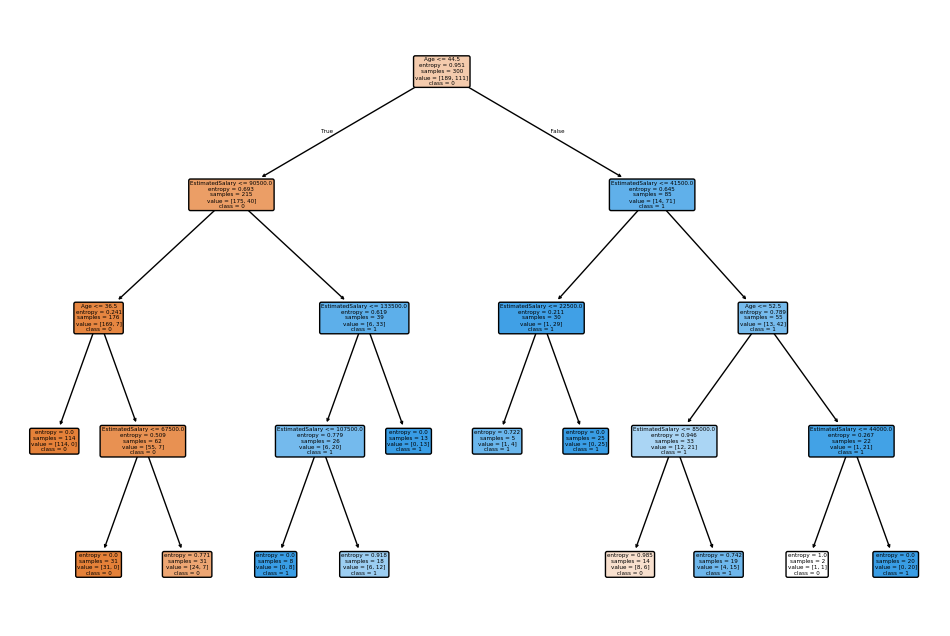

In [57]:
# Visualize with plot_tree() (recommended for quick visualization)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(
    classifier,
    filled=True,           # color nodes by class
    feature_names=X.columns, # Get feature names from DataFrame columns
    class_names=['0', '1'], # Use string representation of class names
    rounded=True           # rounded corners for readability
)
plt.show()